In [2]:
from DS_detector import gen_pics_for_detection
from DS_Planck_Unet import load_planck_model
import numpy as np
from matplotlib import pyplot as plt

In [3]:
all_dict = gen_pics_for_detection(0, load_planck_model(
    '/home/rt2122/Models/pz_only/pz_only.ep0014-vl0.006663-l0.004144.hdf5'), step=8)

In [16]:
def connect_masks(ans, pic_idx, size=64, big_shape=(1024, 1024, 1)):
    import numpy as np
    
    connected_ans = np.zeros(big_shape)
    coef = np.zeros(big_shape)
    
    for i in range(len(ans)):
        x, y = pic_idx[i]
        connected_ans[x:x+size, y:y+size, :] += ans[i]
        coef[x:x+size,y:y+size, :] += np.ones((size, size, 1))
    plt.imshow(coef[:,:,0])
    print(coef.max())
    
    connected_ans /= coef
    return coef 

81.0


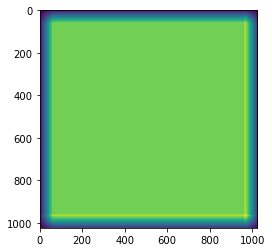

In [17]:
a = connect_masks(all_dict['ans'], all_dict['pic_idx'])

In [10]:
a.min(), a.max()

(1.0, 81.0)

In [11]:
a[200,200]

array([64.])

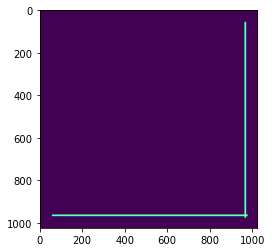

In [13]:
plt.imshow((a > 64)[:,:,0])